# 3. **Elasticidad del Precio**
**Resumen:** El análisis de elasticidad precio-demanda permite evaluar cómo los cambios en los precios afectan la demanda de aguacates. Comprender la elasticidad puede ayudar a formular estrategias de precios más efectivas.

La fórmula de elasticidad precio-demanda es:

$$
E_d = \frac{\% \text{Cambio en la cantidad demandada}}{\% \text{Cambio en el precio}} = \frac{\Delta Q / Q}{\Delta P / P}
$$

## 1. **Elasticidad Precio-Demanda por Año:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

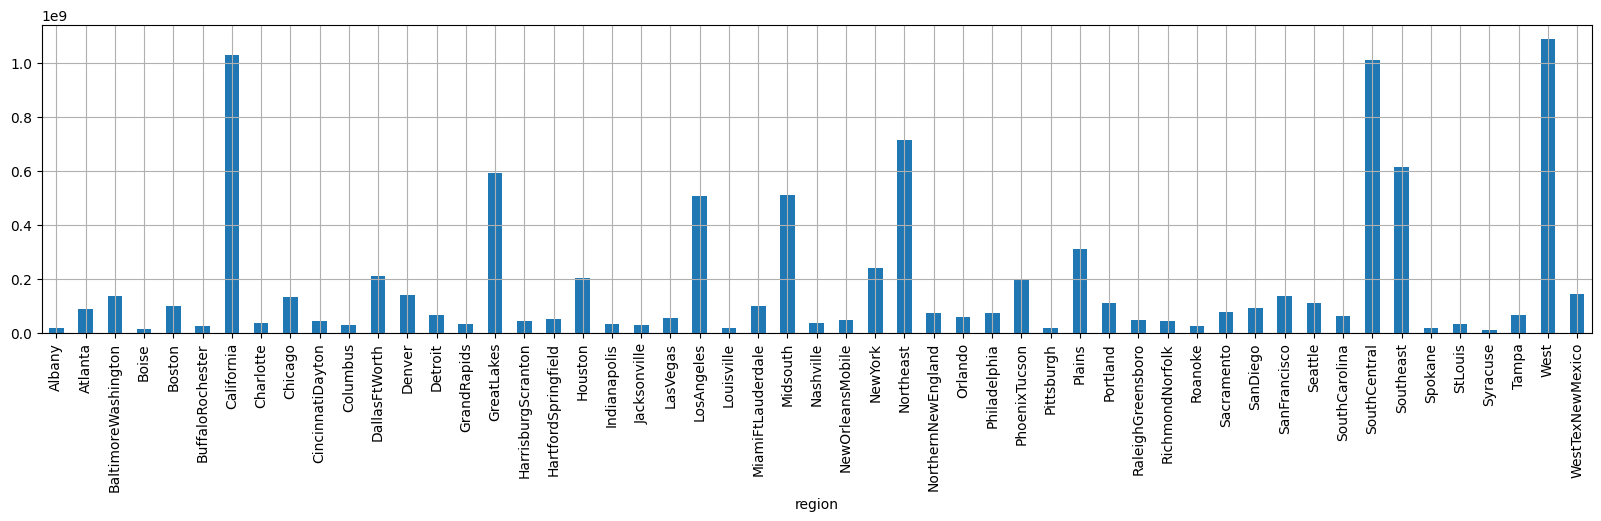

In [3]:
df_subset = df_cp[df_cp['region']!= 'TotalUS']
pd.unique(df_subset['region'])

grouped = df_subset.groupby(['region'])['Total Volume'].sum()

fig, ax= plt.subplots(figsize=(20,4))
grouped.plot(kind='bar', ax=ax )
# plt.ylim(0, 0.3*10**9)
plt.grid()

# fig, ax = plt.subplots( )
# ax.scatter(x=x_values,y= y_values, c=z_values, alpha=0.5)#.map(coloring_alcovados)
# plt.ylim(0,1)
# plt.xlim(-1,1)
# ax.grid()

In [4]:
# a_alvocado= pd.pivot_table(df_subset, values='Total Volume', index=['region','date'])
# a_alvocado

In [5]:
pd.unique(df_cp['region'])

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

Descibiendo el problema, al calcular la elasticidad no solo aparece un nan al inicio (Que es lo de menos), sino que aparecen infinitos y menos infinitos que hay que tratar

In [7]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_cp_elast_year = df_cp_elast.sort_values(by='year')

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast_year['Elasticity'] = df_cp_elast_year['Total Volume'].pct_change() /  df_cp_elast_year['AveragePrice'].pct_change()

# Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_year_sorted =df_cp_elast_year[-df_cp_elast_year['Elasticity'].isin([-np.inf,np.inf])]



,Elasticity
year,
2015,-3.484355
2016,-4.015446
2017,0.070347
2018,-7.780235


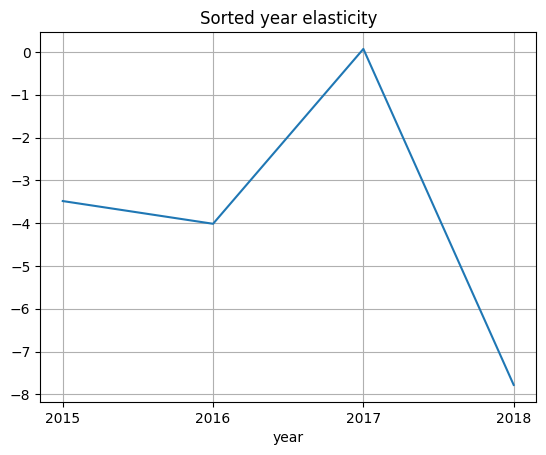

In [8]:
# Creem el group by adient
yearly_elasticity_sort = df_cp_elast_year_sorted.loc[1:,:].groupby("year").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
yearly_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'line',ax= ax )
ax.set_xticks(yearly_elasticity_sort.index)
ax.grid()
plt.title('Sorted year elasticity')

yearly_elasticity_sort

In [9]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast['Elasticity'] = df_cp_elast['Total Volume'].pct_change() /  df_cp_elast['AveragePrice'].pct_change()

# Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_clean =df_cp_elast[-df_cp_elast['Elasticity'].isin([-np.inf,np.inf])]


Text(0.5, 1.0, 'Non sorted yearly elasticity')

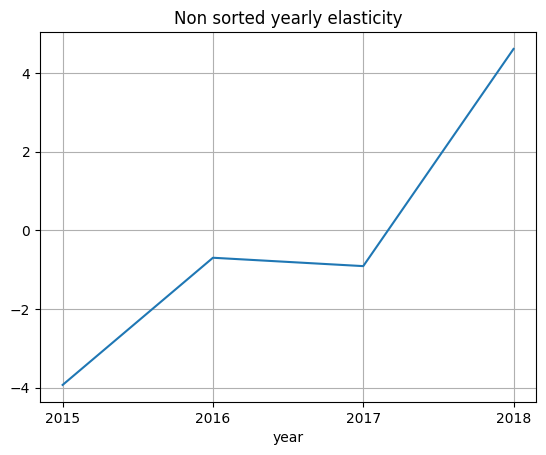

In [10]:
# Creem el group by adient
yearly_elasticity = df_cp_elast_clean.loc[1:,:].groupby("year").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
yearly_elasticity.loc[:,'Elasticity'].plot(kind = 'line',ax= ax )
ax.set_xticks(yearly_elasticity.index)
ax.grid()
plt.title('Non sorted yearly elasticity')


## 2. **Comparación de Elasticidad en Diferentes Mercados:**
   - **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.

### 2. Sorted

In [11]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_cp_elast_region = df_cp_elast.sort_values(by='region')

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast_region['Elasticity'] = df_cp_elast_region['Total Volume'].pct_change() /  df_cp_elast_region['AveragePrice'].pct_change()

# Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_region_sorted =df_cp_elast_region[-df_cp_elast_region['Elasticity'].isin([-np.inf,np.inf])]

Text(0.5, 1.0, 'Sorted region elasticity')

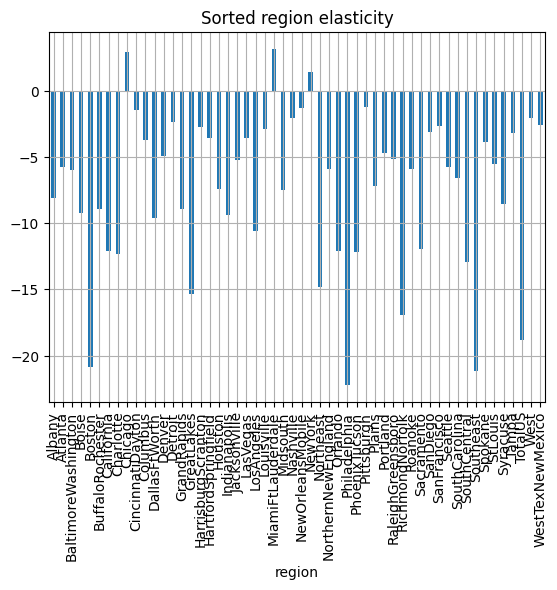

In [12]:
# Creem el group by adient
region_elasticity_sort = df_cp_elast_region_sorted.loc[1:,:].groupby("region").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
region_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax )
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted region elasticity')

### 2. Non Sorted

Text(0.5, 1.0, 'Non sorted region elasticity')

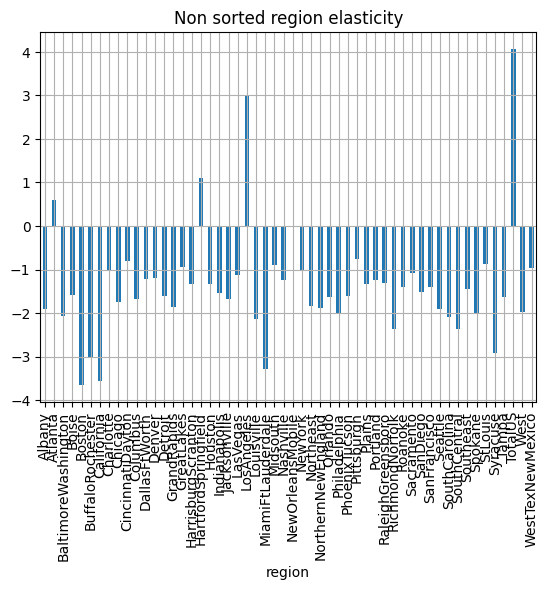

In [13]:
# Creem el group by adient
region_elasticity = df_cp_elast_clean.loc[1:,:].groupby("region").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
region_elasticity.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax )
ax.grid()
plt.title('Non sorted region elasticity')



## 3. **Elasticidad a Nivel de Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.

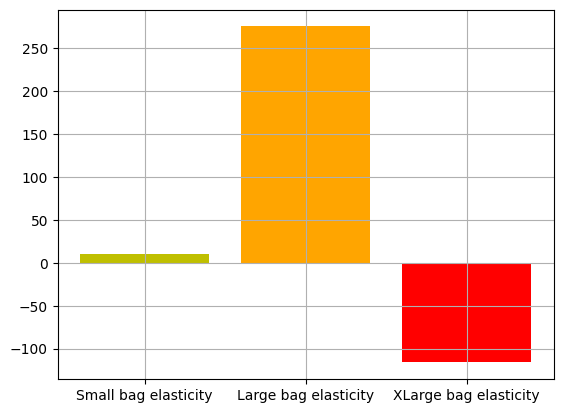

In [14]:
df_cp.head()
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast_bags = df_cp.copy()

df_cp_elast_bags['Small bag elasticity']= df_cp_elast_year['Small Bags'].pct_change() /  df_cp_elast_year['AveragePrice'].pct_change()
df_cp_elast_bags['Large bag elasticity']= df_cp_elast_year['Large Bags'].pct_change() /  df_cp_elast_year['AveragePrice'].pct_change()
df_cp_elast_bags['XLarge bag elasticity']= df_cp_elast_year['XLarge Bags'].pct_change() /  df_cp_elast_year['AveragePrice'].pct_change()

df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Small bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Large bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['XLarge bag elasticity'].isin([-np.inf,np.inf])]

bag_means = df_cp_elast_bags.loc[1:,['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']].mean()

labels= ['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']

plt.bar(x=labels, height = bag_means, color = ('y', 'orange', 'r'))
plt.grid()

## 4. **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.

### 4. Sorted

In [15]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_cp_elast_type = df_cp_elast.sort_values(by='type')

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast_type['Elasticity'] = df_cp_elast_type['Total Volume'].pct_change() /  df_cp_elast_type['AveragePrice'].pct_change()

# Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_type_sorted =df_cp_elast_type[-df_cp_elast_type['Elasticity'].isin([-np.inf,np.inf])]

Text(0.5, 1.0, 'Sorted type elasticity')

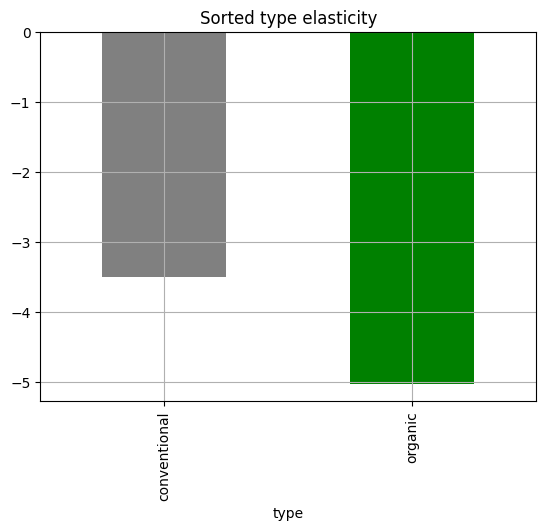

In [16]:
# Creem el group by adient
type_elasticity_sort = df_cp_elast_type_sorted.loc[1:,:].groupby("type").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
type_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax, color = ['gray','green'])
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted type elasticity')

### 4. Non Sorted

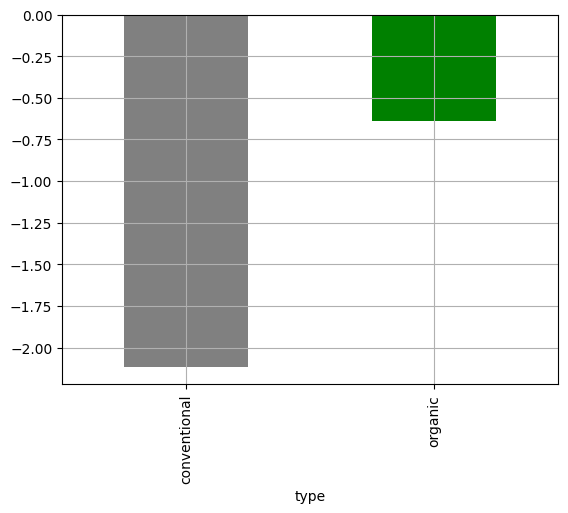

In [17]:
# Creem el group by adient
type_elasticity = df_cp_elast_clean.loc[1:,:].groupby("type").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
type_elasticity.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax, color = ['gray','green'])
ax.grid()

## 5. **Análisis de la Elasticidad Precios-Ventas:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.

### 5. Sorted

In [25]:
import os
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 28.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 7.2 MB/s eta 0:00:0000:01


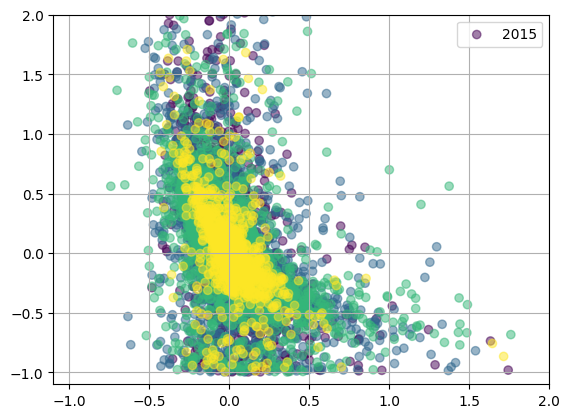

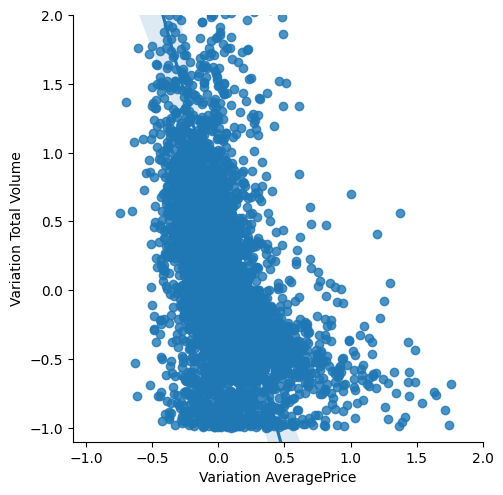

In [42]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_cp_elast_year = df_cp_elast.sort_values(by='year')
# df_cp_elast_year=df_cp_elast_year[df_cp_elast_year['year']==2015]

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast_year['Variation Total Volume'] = df_cp_elast_year['Total Volume'].pct_change()   
df_cp_elast_year['Variation AveragePrice'] = df_cp_elast_year['AveragePrice'].pct_change()

df_cp_elast_year=df_cp_elast_year.loc[1:,:]

y_values= df_cp_elast_year.loc[1:,'Variation Total Volume']
x_values= df_cp_elast_year.loc[1:,'Variation AveragePrice']
z_values= df_cp_elast_year.loc[1:,'year']


fig, ax = plt.subplots( )
ax.scatter(x=x_values,y= y_values, c=z_values, alpha=0.5)#.map(coloring_alcovados)
plt.ylim(-1.1,2)
plt.xlim(-1.1,2)
ax.grid()
plt.legend(z_values)
plt.show()

import seaborn as sns
sns.lmplot(x='Variation AveragePrice',y='Variation Total Volume',data=df_cp_elast_year,fit_reg=True)
plt.ylim(-1.1,2)
plt.xlim(-1.1,2)
ax.grid()
plt.show()


In [39]:
df_cp_elast_year

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Variation Total Volume,Variation AveragePrice
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,-0.535807,0.451613
10,10,2015-10-18,1.12,84843.44,924.86,75595.85,117.07,8205.66,7877.86,327.80,0.00,conventional,2015,Albany,0.546066,-0.170370
79,27,2015-06-21,0.99,554763.76,449311.47,30231.78,678.40,74542.11,55484.76,19010.81,46.54,conventional,2015,Atlanta,5.538676,-0.116071
78,26,2015-06-28,1.13,435210.71,331353.43,37698.53,816.56,65342.19,52099.76,13108.03,134.40,conventional,2015,Atlanta,-0.215503,0.141414
77,25,2015-07-05,1.01,562462.33,436377.91,54675.38,848.55,70560.49,50684.74,19851.00,24.75,conventional,2015,Atlanta,0.292391,-0.106195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,21,2015-08-02,1.45,75133.10,509.94,62035.06,741.08,11847.02,11768.52,78.50,0.00,conventional,2015,Albany,-0.323984,0.294643
22,22,2015-07-26,1.11,106757.10,648.75,91949.05,966.61,13192.69,13061.53,131.16,0.00,conventional,2015,Albany,0.420906,-0.234483
23,23,2015-07-19,1.26,96617.00,1042.10,82049.40,2238.02,11287.48,11103.49,183.99,0.00,conventional,2015,Albany,-0.094983,0.135135
24,24,2015-07-12,1.05,124055.31,672.25,94693.52,4257.64,24431.90,24290.08,108.49,33.33,conventional,2015,Albany,0.283990,-0.166667


### 5. Non-Sorted

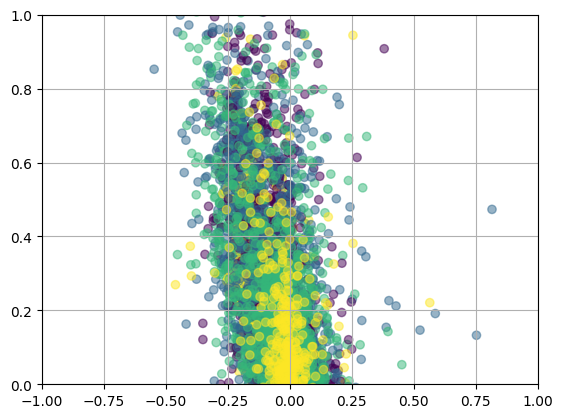

In [19]:
df_cp_elast['Variation Total Volume'] = df_cp_elast['Total Volume'].pct_change()   
df_cp_elast['Variation AveragePrice'] = df_cp_elast['AveragePrice'].pct_change()

coloring_alcovados = {'conventional': 'gray', 'organic': 'green'}

y_values= df_cp_elast.loc[1:,'Variation Total Volume']
x_values= df_cp_elast.loc[1:,'Variation AveragePrice']
z_values= df_cp_elast.loc[1:,'year']

fig, ax = plt.subplots( )
ax.scatter(x=x_values,y= y_values, c=z_values, alpha=0.5)#.map(coloring_alcovados)
plt.ylim(0,1)
plt.xlim(-1,1)
ax.grid()

